In [448]:
## Importing Libs df hej
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV, TimeSeriesSplit

from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV ,StratifiedKFold
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler ,StandardScaler ,RobustScaler
from sklearn.feature_selection import f_classif
import os

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import plotly.graph_objects as go
 

def from_quartile_idx(df,quartile,target):
    ## get the index of the quatile in df when creating train/test splits

    counter = 0

    eighty = np.round(df[target].value_counts()[1] * quartile)

    position = 0

    for idx, i in enumerate(df[target]):
        if i == 1:
            counter += 1 

        if counter == eighty:
            position = idx
            print(position)
            break 
    
    return position

def plotlines(data):
    fig = px.line(data_frame=data, x='CrossValidation', y='Accurancy', color='Model', 
                  title="Model Performance", labels={'Accurancy': 'Accuracy'}, 
                  template="plotly_white", markers=True)

    fig.update_traces(mode='lines+markers')
    fig.update_layout(autosize=False, width=1500, height=600)
    fig.show()




def evaluate_model(Ytest, predictions, pos_class, neg_class):
    test_precision = precision_score(Ytest, predictions, pos_label=pos_class)
    test_recall = recall_score(Ytest, predictions, pos_label=pos_class)
    test_f1 = f1_score(Ytest, predictions, pos_label=pos_class)
    test_accuracy = accuracy_score(Ytest, predictions)

    # Get the confusion matrix
    confusion = confusion_matrix(Ytest, predictions, labels=[pos_class, neg_class])

    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=[pos_class, neg_class], 
                yticklabels=[pos_class, neg_class])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    
    plt.title('Confusion Matrix')
    plt.show()




I need python version 3.9.17 in order to run 
import pymssql

In [449]:
# from Preprocessing_Application import DataPreprocessor

# server = 'reporting-db.nystartfinans.net'
# database = 'reporting-db'
# username = 'Andreas'
# password = 'nCq8Sg@1lYnd(E'

# path = "/Users/andreasnilsson/Desktop/Repository Homes/data-behaviour-scorecard/1. Data/1. BSD copy.sql"

# preprocessor = DataPreprocessor(server, database, username, password) ss 


# df = preprocessor.fetch_data_from_sql(path)


In [450]:
#df.to_csv('BSC_raw.csv', index=False)

In [471]:


# # # Read the CSV file.
# df = pd.read_csv('BSC_raw.csv', skiprows=0)


# # Read the CSV file.
df = pd.read_csv('BSC_mani.csv', skiprows=0)

pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])
df =df[df.DisbursedDate >= '2021-01-01' ]

#df =df[df.MOB < 20]

In [472]:
df = df.drop(columns=['Ever30In12Months','WorstDelinquency','WorstDelinquency12M','Ever30','Ever60','Ever60In12Months']) # ,'MOB','TimeSince60',	'Ever60In6Months'

In [473]:
df

,AccountNumber,SnapshotDate,MOB,DisbursedDate,TimeSince30,TimeSince60,Ever30In6Months,Ever60In6Months,P_calibrated,WorstDelinquency6M,Score,Ever90_12M
7736,7203847,2021-12-31,11,2021-01-07,0.0,0.0,0,0,0.048293,0,NaN,0
8294,7205834,2022-08-31,19,2021-01-14,0.0,0.0,0,0,0.042064,1,4.595843,0
1653,7214976,2022-04-30,15,2021-01-19,0.0,0.0,0,0,0.245517,1,4.595843,0
2400,7217557,2021-08-31,7,2021-01-27,0.0,0.0,0,0,0.093630,1,1.877308,0
2440,7217748,2022-04-30,15,2021-01-07,0.0,0.0,0,0,0.072480,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1761,7772395,2022-10-31,4,2022-06-30,0.0,0.0,0,0,0.027863,1,1.877308,0
1824,7772635,2022-10-31,3,2022-07-01,0.0,0.0,0,0,0.080673,1,NaN,0
1875,7772825,2022-10-31,4,2022-06-30,0.0,0.0,0,0,0.122270,0,3.654435,1
1912,7772924,2022-10-31,3,2022-07-01,0.0,0.0,0,0,0.039616,0,3.654435,0


## Data Split

In [474]:

#########################
#df = toKeep.copy()

quartile1 = 0.7 
quartile2 = 0.85 
 

position1 = from_quartile_idx(df,quartile1,'Ever90_12M')
position2 = from_quartile_idx(df,quartile2,'Ever90_12M')



# Split the data
train, test , val = df.iloc[:position1], df.iloc[position1:position2] ,df.iloc[position2:]

toPlotPDtrain = train.copy()
toPlotPDtrain = val.copy()
toPlotPDtest = test.copy()


print(len(train))
print(len(val))
print(len(test))


2970
3493
2970
656
523


In [475]:
# Create Xtrain, Ytrain, Xtest, Ytest
Xtrain, Ytrain = np.array(train.drop(columns=['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M'])), np.ravel(train['Ever90_12M'])

Xval, Yval = np.array(val.drop(columns=['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M'])), np.ravel(val['Ever90_12M'])

Xtest, Ytest = np.array(test.drop(columns=['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M'])), np.ravel(test['Ever90_12M'])




In [476]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import pandas as pd

models = {}  # Dictionary to store trained models


def train_and_validate(model, X, y, name):
    #tscv = TimeSeriesSplit(n_splits=2) 
    
    tscv = StratifiedKFold(n_splits=5) 
    
    
    model.fit(X, y)
    #CVS = cross_val_score(model, X, y ,cv=tscv)# , 

    CVS = cross_val_score(model, X, y )# , 

    df = pd.DataFrame(CVS)
    df['Model'] = name
    df['CrossValidation'] = list(range(1, len(CVS)+1))
    return df, model  # Return both the results and the trained model



# Create and crossvalidate models
dfs = []


# Best parameters
best_params = {'criterion': 'friedman_mse','learning_rate': 0.01,'max_depth': 15,'max_features': 'log2','min_samples_leaf': 1,'n_estimators': 50,'subsample': 0.6}


results, trained_model = train_and_validate(GradientBoostingClassifier(**best_params), Xtrain, Ytrain, 'GradientBoostingClassifier')
dfs.append(results)
models['GradientBoostingClassifier'] = trained_model  # Store the trained model



# Best parameters
best_params = {'n_estimators': 7,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0.0}

results, trained_model = train_and_validate(RandomForestClassifier(**best_params), Xtrain, Ytrain, 'RandomForestClassifier')
dfs.append(results)
models['RandomForestClassifier'] = trained_model  # Store the trained model



best_params = {'criterion': 'gini',
 'splitter': 'random',
 'max_depth': 7,
 'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 21,
 'min_impurity_decrease': 0.0}
results, trained_model = train_and_validate(DecisionTreeClassifier(**best_params), Xtrain, Ytrain, 'DecisionTreeClassifier')
dfs.append(results)
models['DecisionTreeClassifier'] = trained_model  # Store the trained model



# Hyperparameters you've determined
best_params = {'penalty': 'elasticnet',
 'C': 1000.0,
 'solver': 'saga',
 'l1_ratio': 0.975,
 'fit_intercept': True,
 'warm_start': True,
 'max_iter': 10000000}

 #'max_iter': 10000000}

#'C': 0.001, 'max_iter': 1000000, 'penalty': 'l2', 'solver': 'lbfgs'


results, trained_model = train_and_validate(LogisticRegression(**best_params), Xtrain, Ytrain, 'LogisticRegression')
dfs.append(results)
models['LogisticRegression'] = trained_model  # Store the trained model


# Merge all results
result = pd.concat(dfs, ignore_index=True)
result.columns = ['Accurancy', 'Model','CrossValidation']


In [477]:


# Make sure to call the function using the correct data:
plotlines(result)

In [478]:


# Predictions with DecisionTreeClassifier on Training set
dtc_predictions_train = models['DecisionTreeClassifier'].predict(Xtrain)
dtc_train_score = accuracy_score(Ytrain, dtc_predictions_train)

# Predictions with LogisticRegression on Training set
lg_predictions_train = models['LogisticRegression'].predict(Xtrain)
lg_train_score = accuracy_score(Ytrain, lg_predictions_train)

# Predictions with RandomForestClassifier on Training set
rft_predictions_train = models['RandomForestClassifier'].predict(Xtrain)
rft_train_score = accuracy_score(Ytrain, rft_predictions_train)

# Predictions with GradientBoostingClassifier on Training set
gb_predictions_train = models['GradientBoostingClassifier'].predict(Xtrain)
gb_train_score = accuracy_score(Ytrain, gb_predictions_train)




# Predictions with DecisionTreeClassifier
dtc_predictions_val = models['DecisionTreeClassifier'].predict(Xval)
dtc_validation_score = accuracy_score(Yval, dtc_predictions_val)


# Predictions with LogisticRegression
lg_predictions_val = models['LogisticRegression'].predict(Xval)
lg_validation_score = accuracy_score(Yval, lg_predictions_val)


rft_predictions_val = models['RandomForestClassifier'].predict(Xval)
rft_validation_score = accuracy_score(Yval, rft_predictions_val)

# Predictions with LogisticRegression
bg_predictions_val = models['GradientBoostingClassifier'].predict(Xval)
gb_validation_score = accuracy_score(Yval, bg_predictions_val)



# Predictions with DecisionTreeClassifier
dtc_predictions_test = models['DecisionTreeClassifier'].predict(Xtest)
dtc_validation_score = accuracy_score(Ytest, dtc_predictions_test)


# Predictions with LogisticRegression
lg_predictions_test = models['LogisticRegression'].predict(Xtest)
lg_validation_score = accuracy_score(Ytest, lg_predictions_test)


rft_predictions_test = models['RandomForestClassifier'].predict(Xtest)
rft_validation_score = accuracy_score(Ytest, rft_predictions_test)

# Predictions with LogisticRegression
bg_predictions_test = models['GradientBoostingClassifier'].predict(Xtest)
gb_validation_score = accuracy_score(Ytest, bg_predictions_test)

# For GradientBoostingClassifier
gb_probas = models['GradientBoostingClassifier'].predict_proba(Xval)
gb_default_probs = gb_probas[:, 1] # This gives you the probabilities of class 1 (i.e., default)

# For LogisticRegression
lg_probas = models['LogisticRegression'].predict_proba(Xval)
lg_default_probs = lg_probas[:, 1] # Probabilities of default

# For DecisionTreeClassifier
dtc_probas = models['DecisionTreeClassifier'].predict_proba(Xval)
dtc_default_probs = dtc_probas[:, 1] # Probabilities of default

# For RandomForestClassifier
rft_probas = models['RandomForestClassifier'].predict_proba(Xval)
rft_default_probs = rft_probas[:, 1] # Probabilities of default


In [479]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Function to calculate all required metrics
def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, pos_label=1),  # Specifying positive label
        'Precision': precision_score(y_true, y_pred, pos_label=1),  # Specifying positive label
        'Recall': recall_score(y_true, y_pred, pos_label=1)  # Specifying positive label
    }

# Training predictions
predictions_train = {
    'GradientBoostingClassifier': gb_predictions_train,
    'LogisticRegression': lg_predictions_train,
    'DecisionTreeClassifier': dtc_predictions_train,
    'RandomForestClassifier': rft_predictions_train
}

# Test predictions
predictions_validation = {
    'GradientBoostingClassifier': bg_predictions_val,
    'LogisticRegression': lg_predictions_val,
    'DecisionTreeClassifier': dtc_predictions_val,
    'RandomForestClassifier': rft_predictions_val
}

# Test predictions
predictions_test = {
    'GradientBoostingClassifier': bg_predictions_test,
    'LogisticRegression': lg_predictions_test,
    'DecisionTreeClassifier': dtc_predictions_test,
    'RandomForestClassifier': rft_predictions_test
}

# Compute metrics for training data
train_metrics = {model: compute_metrics(Ytrain, pred) for model, pred in predictions_train.items()}

# Compute metrics for test data
val_metrics = {model: compute_metrics(Yval, pred) for model, pred in predictions_validation.items()}

# Compute metrics for test data
test_metrics = {model: compute_metrics(Ytest, pred) for model, pred in predictions_test.items()}

# Convert to dataframes
df_train = pd.DataFrame.from_dict(train_metrics, orient='columns').T
df_val = pd.DataFrame.from_dict(val_metrics, orient='columns').T
df_test = pd.DataFrame.from_dict(test_metrics, orient='columns').T

# Rename columns to distinguish between train and test
df_train.columns = [f"Train_{col}" for col in df_train.columns]
df_val.columns = [f"Validation_{col}" for col in df_val.columns]
df_test.columns = [f"Test_{col}" for col in df_test.columns]

# Combine the dataframes
results_df = pd.concat([df_train, df_val,df_test], axis=1)

results_df


/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Train_Accuracy,Train_F1 Score,Train_Precision,Train_Recall,Validation_Accuracy,Validation_F1 Score,Validation_Precision,Validation_Recall,Test_Accuracy,Test_F1 Score,Test_Precision,Test_Recall
GradientBoostingClassifier,0.846128,0.000000,0.000000,0.000000,0.847561,0.000000,0.000000,0.000000,0.812620,0.000000,0.000000,0.000000
LogisticRegression,0.881818,0.450704,0.791209,0.315098,0.875000,0.422535,0.697674,0.303030,0.862333,0.446154,0.906250,0.295918
DecisionTreeClassifier,0.863636,0.267631,0.770833,0.161926,0.864329,0.198198,0.916667,0.111111,0.829828,0.198198,0.846154,0.112245
RandomForestClassifier,0.887879,0.485317,0.826316,0.343545,0.875000,0.422535,0.697674,0.303030,0.862333,0.446154,0.906250,0.295918


In [480]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have 'results_df' already defined
results_df = results_df.sort_values(by='Validation_Accuracy', ascending=False)
models_ = results_df.index

# Create a 3x2 grid for subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Train vs Validation vs Test Accuracy', 
        'Train vs Validation vs Test F1 Score', 
        'Train vs Validation vs Test Precision', 
        'Train vs Validation vs Test Recall')
)

format_value = lambda x: "{:.2f}".format(x)

# Metrics to plot
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
prefixes = ['Train_', 'Validation_', 'Test_']

# Loop over the metrics and prefixes to add the traces
for i, metric in enumerate(metrics):
    for prefix in prefixes:
        col = (i % 2) + 1
        row = (i // 2) + 1
        color = 'blue' if prefix == 'Train_' else ('green' if prefix == 'Validation_' else 'orange')  # Changed color for Test set
        fig.add_trace(
            go.Bar(
                x=models_, 
                y=results_df[prefix + metric].values, 
                name=f'{prefix[:-1]} {metric}', 
                marker_color=color,
                text=[format_value(val) for val in results_df[prefix + metric].values], 
                textposition='outside',
                width=0.2,  # Adjusting the bar width
                textfont=dict(size=10)  # Adjusting the text font size
            ), 
            row=row, 
            col=col
        )

fig.update_layout(
    title_text="Comparison of Model Metrics", 
    barmode='group',
    width=1300,  
    height=1200
)
fig.show()


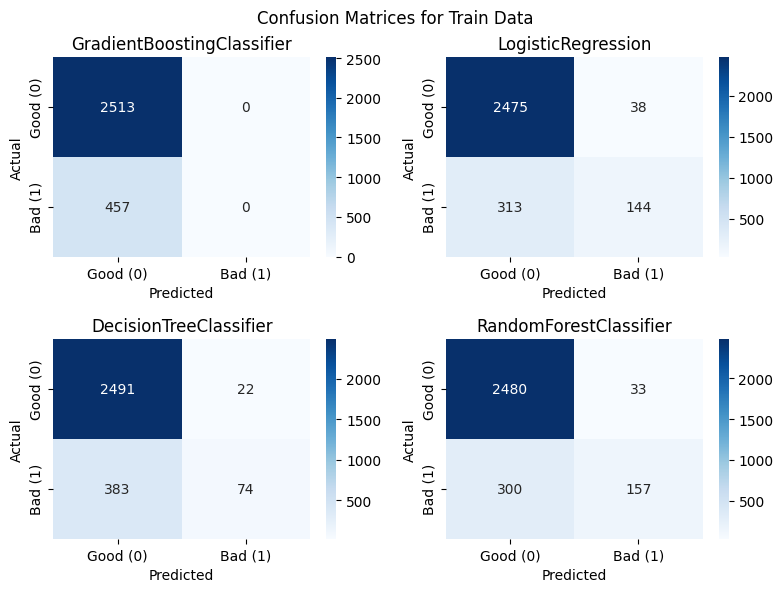

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

    # Plot the confusion matrix on the given axis
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'], ax=ax)
    ax.set_ylabel('Actual')                                              
    ax.set_xlabel('Predicted')
    ax.set_title(f'{model_name}')

# Setup a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Confusion Matrices for Train Data', fontsize=12)

# List of axes and model names
ax_list = axes.flatten()
model_names = list(predictions_train.keys())

# Plot confusion matrices for test data on the 2x2 grid
for ax, model_name in zip(ax_list, model_names):
    plot_confusion_matrix(ax, Ytrain, predictions_train[model_name], model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


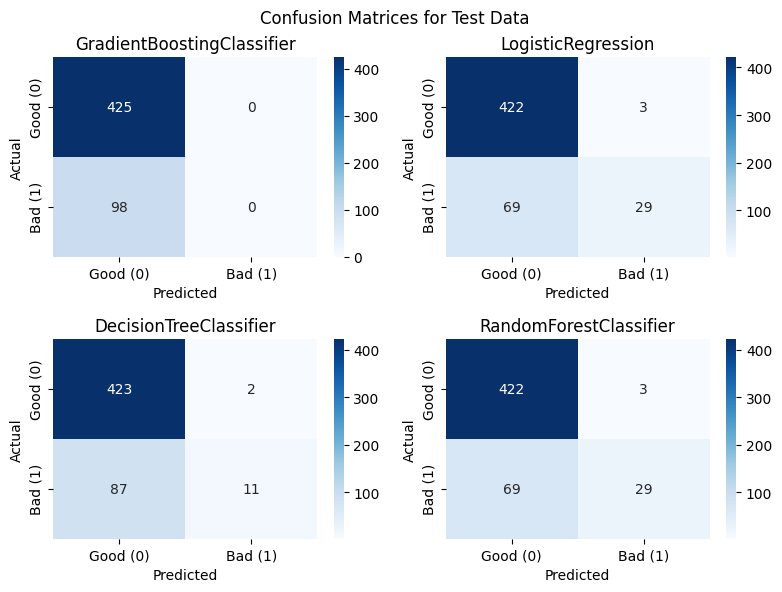

In [482]:
# Setup a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Confusion Matrices for Test Data', fontsize=12)

# List of axes and model names
ax_list = axes.flatten()
model_names = list(predictions_test.keys())

# Plot confusion matrices for test data on the 2x2 grid
for ax, model_name in zip(ax_list, model_names):
    plot_confusion_matrix(ax, Ytest, predictions_test[model_name], model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

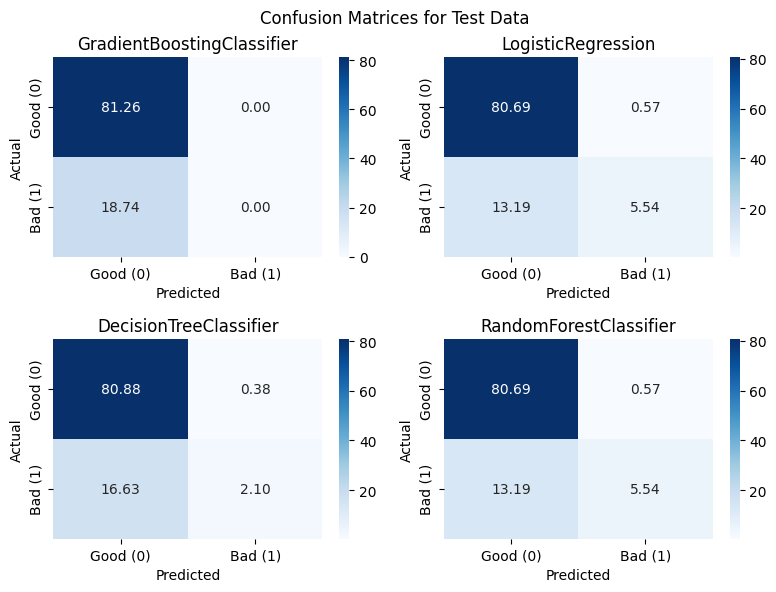

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    
    # Convert matrix to percentages of the total input
    cm_percentage = (cm / cm.sum()) * 100

    # Plot the confusion matrix on the given axis
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'], ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'{model_name}')

# Setup a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Confusion Matrices for Test Data', fontsize=12)

# Assuming predictions_validation is a dictionary with model names as keys and predicted values as values
# List of axes and model names
ax_list = axes.flatten()
model_names = list(predictions_test.keys())

# Plot confusion matrices for test data on the 2x2 grid
for ax, model_name in zip(ax_list, model_names):
    plot_confusion_matrix(ax, Ytest, predictions_test[model_name], model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


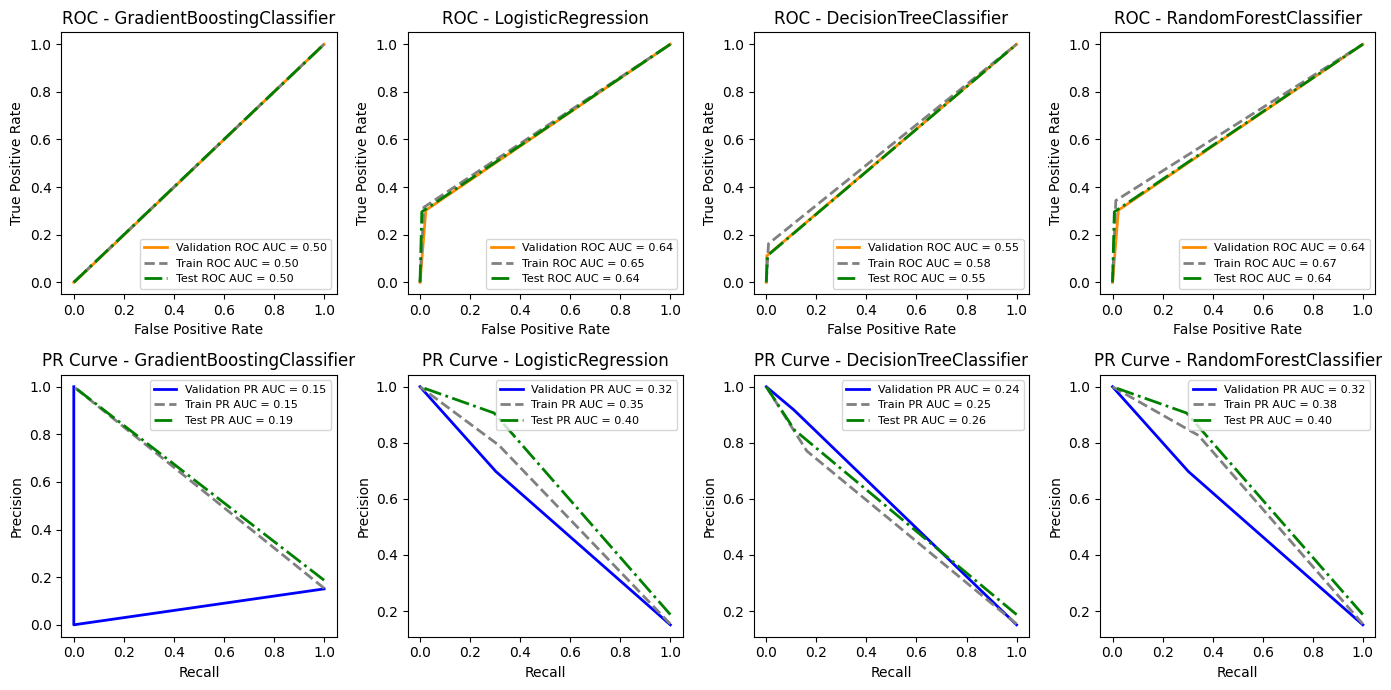

In [484]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

def plot_curves(y_true_Validation, y_probs_Validation, y_true_train, y_probs_train, y_true_test, y_probs_test, model_name):
    # Validation ROC values
    fpr_Validation, tpr_Validation, _ = roc_curve(y_true_Validation, y_probs_Validation)
    roc_auc_Validation = auc(fpr_Validation, tpr_Validation)
    
    # Train ROC values
    fpr_train, tpr_train, _ = roc_curve(y_true_train, y_probs_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Test ROC values
    fpr_test, tpr_test, _ = roc_curve(y_true_test, y_probs_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Validation PR values
    precision_Validation, recall_Validation, _ = precision_recall_curve(y_true_Validation, y_probs_Validation)
    pr_auc_Validation = average_precision_score(y_true_Validation, y_probs_Validation)

    # Train PR values
    precision_train, recall_train, _ = precision_recall_curve(y_true_train, y_probs_train)
    pr_auc_train = average_precision_score(y_true_train, y_probs_train)

    # Test PR values
    precision_test, recall_test, _ = precision_recall_curve(y_true_test, y_probs_test)
    pr_auc_test = average_precision_score(y_true_test, y_probs_test)

    # ROC Curve
    plt.subplot(2, 4, list(predictions_validation.keys()).index(model_name) + 1)
    plt.plot(fpr_Validation, tpr_Validation, color='darkorange', lw=2, label=f'Validation ROC AUC = {roc_auc_Validation:.2f}')
    plt.plot(fpr_train, tpr_train, color='gray', lw=2, linestyle='--', label=f'Train ROC AUC = {roc_auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, color='green', lw=2, linestyle='-.', label=f'Test ROC AUC = {roc_auc_test:.2f}')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'ROC - {model_name}', fontsize=12)
    plt.legend(loc="lower right", fontsize=8)

    # PR Curve
    plt.subplot(2, 4, list(predictions_validation.keys()).index(model_name) + 5)
    plt.plot(recall_Validation, precision_Validation, color='blue', lw=2, label=f'Validation PR AUC = {pr_auc_Validation:.2f}')
    plt.plot(recall_train, precision_train, color='gray', lw=2, linestyle='--', label=f'Train PR AUC = {pr_auc_train:.2f}')
    plt.plot(recall_test, precision_test, color='green', lw=2, linestyle='-.', label=f'Test PR AUC = {pr_auc_test:.2f}')
    plt.xlabel('Recall', fontsize=10)
    plt.ylabel('Precision', fontsize=10)
    plt.title(f'PR Curve - {model_name}', fontsize=12)
    plt.legend(loc="upper right", fontsize=8)

plt.figure(figsize=(14, 7))
for model_name in predictions_validation.keys():
    # Assuming the model returns the probability of the positive class for Validation, train, and test
    plot_curves(Yval, predictions_validation[model_name], Ytrain, predictions_train[model_name], Ytest, predictions_test[model_name], model_name)

plt.tight_layout()
plt.show()


In [485]:
binsV = [0, 0.28, 0.36, 0.46, 0.58, 0.71, 1]


#binsV = [0, 0.33, 0.40, 0.48, 0.59, 1]
# RandomForestClassifier
# LogisticRegression

modelT = 'RandomForestClassifier'

# For LogisticRegression
lg_probas_Train = models[modelT].predict_proba(Xtrain)
lg_default_probs_Train = lg_probas_Train[:, 1] # Probabilities of default

train_upsampled_re = train.copy()
#train_upsampled_re = train

train_upsampled_re['Probability_model'] = pd.DataFrame(lg_default_probs_Train)
pn1 = train_upsampled_re['Probability_model']
# Before upsampling so its relative to the risk the model trained on 

train_upsampled_re['Probability_Bins'] = pd.cut(train_upsampled_re['Probability_model'], bins=binsV, labels=False)


#train_upsampled_re['YearMonth'] = train_upsampled_re['ReceivedDate'].dt.to_period('M')


## 
#train_upsampled_re = train_upsampled_re.drop_duplicates() 



# For LogisticRegression
lg_probas = models[modelT].predict_proba(Xval)
lg_default_probs_Val = lg_probas[:, 1] # Probabilities of default

val_re = val.copy()
val_re['Probability_model'] = lg_default_probs_Val
pn2 = val_re['Probability_model']

# Before upsampling so its relative to the risk the model trained on 
#test_re['Probability_Bins'] = pd.cut(test_re['Probability_model'], bins=4, labels=False)
val_re['Probability_Bins'] = pd.cut(val_re['Probability_model'], bins=binsV, labels=False)
#
# 
# val_re['YearMonth'] = val_re['ReceivedDate'].dt.to_period('M')



# For LogisticRegression
lg_probas = models[modelT].predict_proba(Xtest)
lg_default_probs_Test = lg_probas[:, 1] # Probabilities of default

test_re = test.copy()
test_re['Probability_model'] = lg_default_probs_Test
pn3= test_re['Probability_model'] 

# Before upsampling so its relative to the risk the model trained on 
#test_re['Probability_Bins'] = pd.cut(test_re['Probability_model'], bins=4, labels=False)
test_re['Probability_Bins'] = pd.cut(test_re['Probability_model'], bins=binsV, labels=False)

#test_re['YearMonth'] = test_re['ReceivedDate'].dt.to_period('M')

In [486]:
train_upsampled_re

,AccountNumber,SnapshotDate,MOB,DisbursedDate,TimeSince30,TimeSince60,Ever30In6Months,Ever60In6Months,P_calibrated,WorstDelinquency6M,Score,Ever90_12M,Probability_model,Probability_Bins
7736,7203847,2021-12-31,11,2021-01-07,0.0,0.0,0,0,0.048293,0,NaN,0,NaN,NaN
8294,7205834,2022-08-31,19,2021-01-14,0.0,0.0,0,0,0.042064,1,4.595843,0,NaN,NaN
1653,7214976,2022-04-30,15,2021-01-19,0.0,0.0,0,0,0.245517,1,4.595843,0,0.081627,0.0
2400,7217557,2021-08-31,7,2021-01-27,0.0,0.0,0,0,0.093630,1,1.877308,0,0.763048,5.0
2440,7217748,2022-04-30,15,2021-01-07,0.0,0.0,0,0,0.072480,0,NaN,0,0.096239,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,7721236,2022-08-31,5,2022-03-02,0.0,0.0,0,0,0.050490,1,1.877308,0,NaN,NaN
5761,7721269,2022-06-30,4,2022-02-16,0.0,0.0,0,0,0.129112,1,4.595843,0,NaN,NaN
5768,7721293,2022-10-31,8,2022-02-16,0.0,0.0,0,0,0.061943,0,1.484099,0,NaN,NaN
5773,7721301,2022-09-30,7,2022-02-15,0.0,0.0,0,0,0.044349,1,4.595843,0,NaN,NaN


In [487]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_upsampled_re and test_re dataframes are already loaded


def plotScoreDist(train_upsampled_re,val_re,test_re,feature):
    # Create masks for each category
    category1_train = train_upsampled_re[train_upsampled_re['Ever90_12M'] == 0]
    category2_train = train_upsampled_re[train_upsampled_re['Ever90_12M'] == 1]
    category1_val = val_re[val_re['Ever90_12M'] == 0]
    category2_val = val_re[val_re['Ever90_12M'] == 1]
    category1_test = test_re[test_re['Ever90_12M'] == 0]
    category2_test = test_re[test_re['Ever90_12M'] == 1]

    # Create a figure and axis
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 2 columns

    # Plot histograms for train data
    axs[0].hist(category1_train[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 0', density=True)
    axs[0].hist(category2_train[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 1', density=True)
    axs[0].set_title('Train Default Probabilities Hist')
    axs[0].set_xlabel('Probability of Default')
    axs[0].set_ylabel('Density')
    axs[0].legend(loc='upper right')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for test data
    axs[1].hist(category1_val[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 0', density=True)
    axs[1].hist(category2_val[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 1', density=True)
    axs[1].set_title('Validation Default Probabilities Hist')
    axs[1].set_xlabel('Probability of Default')
    axs[1].set_ylabel('Density')
    axs[1].legend(loc='upper right')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for test data
    axs[2].hist(category1_test[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 0', density=True)
    axs[2].hist(category2_test[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 1', density=True)
    axs[2].set_title('Test Default Probabilities Hist')
    axs[2].set_xlabel('Probability of Default')
    axs[2].set_ylabel('Density')
    axs[2].legend(loc='upper right')
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()

    #print(f"Mean Probability for Train Data: {np.mean(train_upsampled_re[feature])}")
    #print(f"Mean Probability for Test Data: {np.mean(test_re[feature])}")


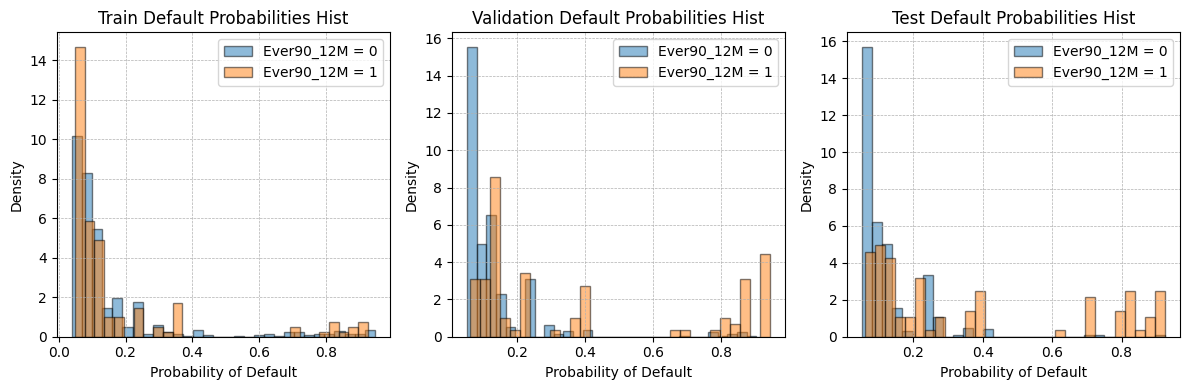

In [488]:
plotScoreDist(train_upsampled_re,val_re,test_re,'Probability_model')

In [432]:


# # Read the CSV file.
#df = pd.read_csv('BSC_raw.csv', skiprows=0)

pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])


ttt = df.copy()

ttt[ttt.Score.isna() =='False' ]

ttt

,AccountNumber,SnapshotDate,MOB,DisbursedDate,TimeSince30,TimeSince60,Ever30In6Months,Ever60In6Months,P_calibrated,WorstDelinquency6M,Score,Ever90_12M
6405,7100928,2020-11-30,10,2020-01-13,0.0,0.0,0,0,0.030716,1,1.877308,0
8762,7109184,2020-08-31,7,2020-01-14,0.0,0.0,0,0,0.026279,0,1.484099,0
8954,7109879,2022-01-31,23,2020-02-13,7.0,0.0,1,1,0.086305,3,64.500000,1
9159,7110562,2021-11-30,22,2020-01-21,0.0,0.0,0,0,0.163570,0,3.654435,0
529,7112659,2021-07-31,18,2020-01-16,0.0,0.0,0,0,0.046524,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1761,7772395,2022-10-31,4,2022-06-30,0.0,0.0,0,0,0.027863,1,1.877308,0
1824,7772635,2022-10-31,3,2022-07-01,0.0,0.0,0,0,0.080673,1,NaN,0
1875,7772825,2022-10-31,4,2022-06-30,0.0,0.0,0,0,0.122270,0,3.654435,1
1912,7772924,2022-10-31,3,2022-07-01,0.0,0.0,0,0,0.039616,0,3.654435,0


## 

In [443]:

# #########################
# #df = toKeep.copy()

quartile1 = 0.7 
quartile2 = 0.85 
 

position1 = from_quartile_idx(ttt,quartile1,'Ever90_12M')
position2 = from_quartile_idx(ttt,quartile2,'Ever90_12M')


ttt =  ttt[['Ever90_12M','Score']]

ttt.dropna(inplace=True)
ttt



# Split the data
otrain, otest , oval = ttt.iloc[:position1], ttt.iloc[position1:position2] ,ttt.iloc[position2:]

otoPlotPDtrain = otrain.copy()
otoPlotPDval = oval.copy()
otoPlotPDtest = otest.copy()


print(len(train))
print(len(val))
print(len(test))


3646
4369
4582
825
772


In [444]:
otoPlotPDval

,Ever90_12M,Score
867,1,3.654435
869,0,4.595843
873,1,1.877308
875,0,4.595843
886,0,3.654435
...,...,...
1750,0,4.595843
1761,0,1.877308
1875,1,3.654435
1912,0,3.654435


0.8064932578725561
0.7099592624356775
0.7669692593356715


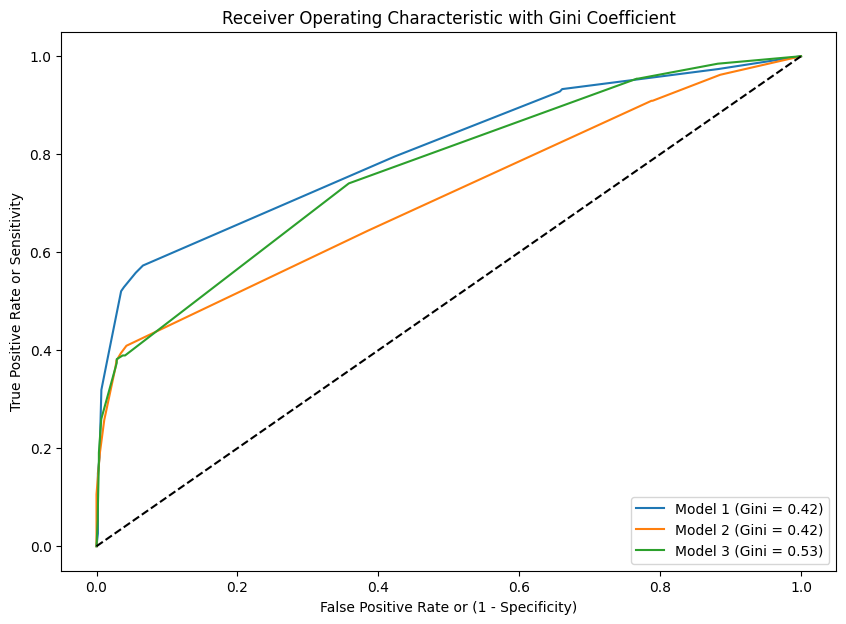

In [447]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true, pd_values_model1, pd_values_model2, and pd_values_model3 are already defined...

# # Calculate AUC and Gini for Model 2
fpr1, tpr1, thresholds1 = roc_curve(otoPlotPDtrain['Ever90_12M'], otoPlotPDtrain['Score'])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)
gini1 = 2*roc_auc1 - 1

# # Calculate AUC and Gini for Model 2
fpr2, tpr2, thresholds2 = roc_curve(otoPlotPDval['Ever90_12M'], otoPlotPDval['Score'])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)
gini2 = 2*roc_auc2 - 1

# Calculate AUC and Gini for Model 3
fpr3, tpr3, thresholds3 = roc_curve(otoPlotPDtest['Ever90_12M'], otoPlotPDtest['Score'])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)
gini3 = 2*roc_auc3 - 1

# Plotting ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label=f'Model 1 (Gini = {gini2:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (Gini = {gini2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (Gini = {gini3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or Sensitivity')
plt.title('Receiver Operating Characteristic with Gini Coefficient')
plt.legend(loc="lower right")
plt.show()

# Define color palette for each model
color_dict = {
    'UC': 'blue',
    'Probability_model': 'green' #'GradientBoostingClassifier': 'your_color_here'  # Replace 'your_color_here' with your desired color
}

# Loop over the metrics
#for i, metric in enumerate(metrics):
col = (i % 2) + 1
row = (i // 2) + 1
for model in models_:
    #fig.add_trace(
    go.Bar(
        x=[model], 
        y=[results_df.at[model, 'Test_' + metric]],
        name=f'{model} {metric}',
        marker_color=color_dict.get(model, '#808080'),  # Using .get() with hexadecimal for grey
        text=format_value(results_df.at[model, 'Test_' + metric]),
        textposition='outside',
        width=0.2, 
        textfont=dict(size=10)
    ), 
    row=row, 
    col=col 
# This closing parenthesis was the issue. 


In [435]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# For Model 2
precision2, recall2, thresholds2 = precision_recall_curve(see['Ever90'], see['UCScore'])
avg_prec2 = average_precision_score(see['Ever90'], see['UCScore'])

# For Model 3
precision3, recall3, thresholds3 = precision_recall_curve(otoPlotPDtest['Ever90_12M'], otoPlotPDtest['Score'])
avg_prec3 = average_precision_score(otoPlotPDtest['Ever90_12M'], otoPlotPDtest['Score'])
print(avg_prec3)

# Plotting PR curves
plt.figure(figsize=(10, 7))
plt.plot(recall2, precision2, label=f'UC (AP = {avg_prec2:.2f})')
plt.plot(recall3, precision3, label=f'New Developed (AP = {avg_prec3:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


NameError: name 'see' is not defined

In [490]:
df


train_upsampled_re = train_upsampled_re[train_upsampled_re.Probability_model > 0]
train_upsampled_re

,AccountNumber,SnapshotDate,MOB,DisbursedDate,TimeSince30,TimeSince60,Ever30In6Months,Ever60In6Months,P_calibrated,WorstDelinquency6M,Score,Ever90_12M,Probability_model,Probability_Bins
1653,7214976,2022-04-30,15,2021-01-19,0.0,0.0,0,0,0.245517,1,4.595843,0,0.081627,0.0
2400,7217557,2021-08-31,7,2021-01-27,0.0,0.0,0,0,0.093630,1,1.877308,0,0.763048,5.0
2440,7217748,2022-04-30,15,2021-01-07,0.0,0.0,0,0,0.072480,0,NaN,0,0.096239,0.0
2575,7218191,2021-09-30,8,2021-01-19,0.0,0.0,0,0,0.023775,1,1.877308,0,0.097117,0.0
2652,7218522,2021-10-31,9,2021-01-04,0.0,0.0,0,0,0.115219,0,3.654435,0,0.231376,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,7710932,2022-04-30,3,2022-01-24,0.0,0.0,0,0,0.068359,0,3.654435,0,0.052352,0.0
2902,7710965,2022-06-30,5,2022-01-21,0.0,0.0,0,0,0.035576,0,1.484099,0,0.061305,0.0
2908,7710981,2022-07-31,6,2022-01-20,0.0,0.0,0,0,0.051766,1,4.595843,0,0.081627,0.0
2940,7711120,2022-07-31,6,2022-01-25,0.0,0.0,0,0,0.109552,0,3.654435,0,0.097117,0.0


0.49472156631247544
0.805523819886477
0.7999759903961585


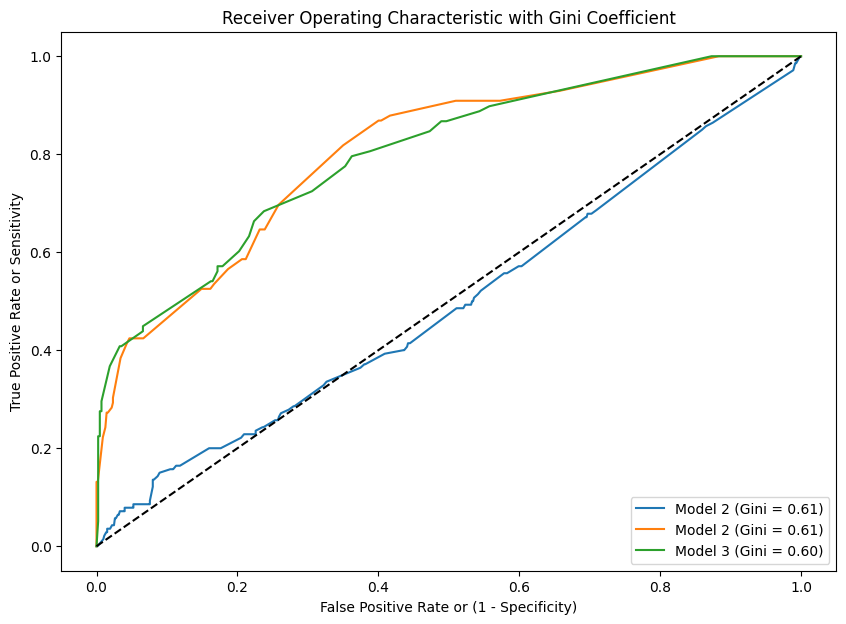

In [491]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true, pd_values_model1, pd_values_model2, and pd_values_model3 are already defined...

# Calculate AUC and Gini for Model 2
fpr1, tpr1, thresholds1 = roc_curve(train_upsampled_re['Ever90_12M'], train_upsampled_re['Probability_model'])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)
gini1 = 2*roc_auc1 - 1


# Calculate AUC and Gini for Model 2
fpr2, tpr2, thresholds2 = roc_curve(val_re['Ever90_12M'], val_re['Probability_model'])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)
gini2 = 2*roc_auc2 - 1

# Calculate AUC and Gini for Model 3
fpr3, tpr3, thresholds3 = roc_curve(test_re['Ever90_12M'], test_re['Probability_model'])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)
gini3 = 2*roc_auc3 - 1

# Plotting ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label=f'Model 2 (Gini = {gini2:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (Gini = {gini2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (Gini = {gini3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or Sensitivity')
plt.title('Receiver Operating Characteristic with Gini Coefficient')
plt.legend(loc="lower right")
plt.show()

# Define color palette for each model
color_dict = {
    'UC': 'blue',
    'Probability_model': 'green' #'GradientBoostingClassifier': 'your_color_here'  # Replace 'your_color_here' with your desired color
}

# Loop over the metrics
#for i, metric in enumerate(metrics):
col = (i % 2) + 1
row = (i // 2) + 1
for model in models_:
    #fig.add_trace(
    go.Bar(
        x=[model], 
        y=[results_df.at[model, 'Test_' + metric]],
        name=f'{model} {metric}',
        marker_color=color_dict.get(model, '#808080'),  # Using .get() with hexadecimal for grey
        text=format_value(results_df.at[model, 'Test_' + metric]),
        textposition='outside',
        width=0.2, 
        textfont=dict(size=10)
    ), 
    row=row, 
    col=col 
# This closing parenthesis was the issue. 


0.45864884899131947


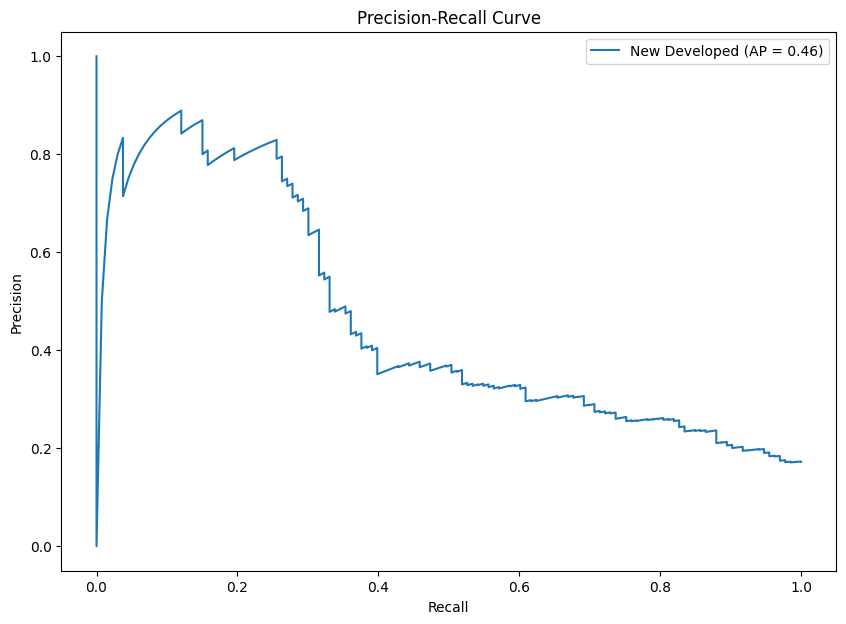

In [438]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# # For Model 2
# precision2, recall2, thresholds2 = precision_recall_curve(see['Ever90'], see['UCScore'])
# avg_prec2 = average_precision_score(see['Ever90'], see['UCScore'])

# For Model 3
precision3, recall3, thresholds3 = precision_recall_curve(test_re['Ever90_12M'], test_re['Probability_model'])
avg_prec3 = average_precision_score(test_re['Ever90_12M'], test_re['Probability_model'])
print(avg_prec3)

# Plotting PR curves
plt.figure(figsize=(10, 7))
#plt.plot(recall2, precision2, label=f'UC (AP = {avg_prec2:.2f})')
plt.plot(recall3, precision3, label=f'New Developed (AP = {avg_prec3:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [ ]:
## 

# Hyperparameter Tunning

In [ ]:
from GridLib import GridSearchCustom
from sklearn.linear_model import LogisticRegression

# Grids for Logistic Regression

# param_grids = [
#     {
#         'penalty': ['l1'],
#         'C': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#         'solver': ['liblinear', 'saga'],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False]
#     },
#     {
#         'penalty': ['l2'],

#         'C': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False],
#         'max_iter': [10000000]
#     },
#     {
#         'penalty': ['elasticnet'],
#         'C': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#         'solver': ['saga'],
#         'l1_ratio': [0.025, 0.05, 0.075, 0.1, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.925, 0.95, 0.975],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False],
#         'max_iter': [10000000]
#     },
#     {
#         'penalty': ['none'],
#         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False],
#         'max_iter': [10000000]
#     }
# ]


reduced_C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


param_grids = [
    {
        'penalty': ['l1'],
        'C': reduced_C,
        'solver': ['liblinear', 'saga'],
        'fit_intercept': [True, False],
        'warm_start': [True, False]
    },
    {
        'penalty': ['l2'],
        'C': reduced_C,
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'fit_intercept': [True, False],
        'warm_start': [True, False],
        'max_iter': [10000000]
    },
    {
        'penalty': ['elasticnet'],
        'C': reduced_C,
        'solver': ['saga'],
        'l1_ratio': [0.025, 0.05, 0.075, 0.1, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.925, 0.95, 0.975],
        'fit_intercept': [True, False],
        'warm_start': [True, False],
        'max_iter': [10000000]
    },
    {
        'penalty': ['none'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'fit_intercept': [True, False],
        'warm_start': [True, False],
        'max_iter': [10000000]
    }
]



all_results = []  # Store results from all grids here
all_best_lists = []  # Store best lists from all grids here
all_best_params = []  # Store best params from all grids here

for idx, param_grid in enumerate(param_grids, 1):
    gsc = GridSearchCustom(LogisticRegression, param_grid)
    gsc.fit(Xtrain, Ytrain, Xval, Yval)
    
    # Get All results
    results = gsc.to_dataframe()
    all_results.append(results)

    # Save winning
    bestlist, best_params = gsc.filter_by_precision()
    
    all_best_lists.append(bestlist)
    all_best_params.append(best_params)

# Now, you can access all the results, best lists, and best parameters across all grids from the lists: `all_results`, `all_best_lists`, and `all_best_params` respectively.


/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3

In [ ]:
all_best_lists[1].tail(30)

,penalty,C,solver,fit_intercept,warm_start,max_iter,train_accuracy,train_precision,train_recall,train_f1,test_accuracy,test_precision,test_recall,test_f1,metric_distance,objective
56,l2,0.1,sag,True,True,10000000,0.905706,0.795620,0.293801,0.429134,0.869215,0.741935,0.28750,0.414414,0.066858,0.908232
57,l2,0.1,sag,True,False,10000000,0.905706,0.795620,0.293801,0.429134,0.869215,0.741935,0.28750,0.414414,0.066858,0.908232
73,l2,1.0,sag,True,False,10000000,0.905869,0.796364,0.295148,0.430678,0.869215,0.741935,0.28750,0.414414,0.068036,0.909098
72,l2,1.0,sag,True,True,10000000,0.905869,0.796364,0.295148,0.430678,0.869215,0.741935,0.28750,0.414414,0.068036,0.909098
89,l2,10.0,sag,True,False,10000000,0.905706,0.793478,0.295148,0.430255,0.869215,0.741935,0.28750,0.414414,0.065557,0.909646
120,l2,1000.0,sag,True,True,10000000,0.905544,0.790614,0.295148,0.429833,0.869215,0.741935,0.28750,0.414414,0.063131,0.910136
88,l2,10.0,sag,True,True,10000000,0.905544,0.790614,0.295148,0.429833,0.869215,0.741935,0.28750,0.414414,0.063131,0.910136
105,l2,100.0,sag,True,False,10000000,0.905544,0.790614,0.295148,0.429833,0.869215,0.741935,0.28750,0.414414,0.063131,0.910136
104,l2,100.0,sag,True,True,10000000,0.905544,0.790614,0.295148,0.429833,0.869215,0.741935,0.28750,0.414414,0.063131,0.910136
121,l2,1000.0,sag,True,False,10000000,0.905544,0.790614,0.295148,0.429833,0.869215,0.741935,0.28750,0.414414,0.063131,0.910136


In [ ]:
all_best_params[2]


{'penalty': 'elasticnet',
 'C': 1000.0,
 'solver': 'saga',
 'l1_ratio': 0.975,
 'fit_intercept': True,
 'warm_start': True,
 'max_iter': 10000000}

# Random Forrest

In [ ]:


# param_grid_random_forest_reduced = {
#     'n_estimators': [5, 7, 10,20, 50],  # Reduced options
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 4, 6, 8, 10],  # Fewer depths
#     'min_samples_split': [2, 5, 8],  # Reduced options
#     'min_samples_leaf': [1, 2,3,4, 6],  # Reduced options
#     'max_features': ['sqrt', 'log2', 0.5, 0.75],  # Reduced options
#     'max_leaf_nodes': [10, 30, 50, 70, 90],  # Fewer nodes
#     'min_impurity_decrease': [0.0, 0.02, 0.04],  # Reduced options
#     #'bootstrap': [True, False],
#     #'oob_score': [True, False],
#     #'n_jobs': [-1],
#     #'ccp_alpha': [0.0, 0.02, 0.04],  # Reduced options
#     #'class_weight': ['balanced']  # Just one option, adjust based on your dataset's needs
# }

expanded_focused_grid = {
    'n_estimators': [3, 4,5, 6,7, 10, 12],  # Broader around 5
    'criterion': ['gini' ],  # Added 'gini' for exploration        , 'entropy'
    'max_depth': [2, 3, 4, 5, 6],  # Broader around 4
    'min_samples_split': [3, 4, 5, 6, 7],  # Broader around 5
    'min_samples_leaf': [2, 3, 4, 5, 6],  # Broader around 4
    'max_features': ['log2'],  # Added 'log2' for exploration     'sqrt', 
    'max_leaf_nodes': [5, 8, 10, 12, 15],  # Broader around 10
    'min_impurity_decrease': [0.0, 0.01, 0.02]  # Slight variation
    #'bootstrap': [True],  # Assuming you might want to use bootstrap=True for RandomForest
    #'oob_score': [False, True]  # You can include both options or just keep one based on your previous results
}





# Using GridSearchCustom (as per your example)
gsc = GridSearchCustom(RandomForestClassifier, expanded_focused_grid)

## Fit 
gsc.fit(Xtrain, Ytrain, Xval, Yval)

## Get All results
results = gsc.to_dataframe()

## Save winning
bestlist, best_params = gsc.filter_by_precision()


/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3

In [ ]:
bestlist

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,max_leaf_nodes,min_impurity_decrease,train_accuracy,train_precision,train_recall,train_f1,test_accuracy,test_precision,test_recall,test_f1,metric_distance,objective
9567,10,gini,2,5,4,log2,15,0.0,0.914648,0.829787,0.367925,0.509804,0.872233,0.800000,0.2750,0.409302,0.146362,0.885472
6585,6,gini,4,5,6,log2,5,0.0,0.914648,0.829787,0.367925,0.509804,0.872233,0.800000,0.2750,0.409302,0.146362,0.885472
5370,5,gini,6,4,5,log2,5,0.0,0.914648,0.829787,0.367925,0.509804,0.872233,0.800000,0.2750,0.409302,0.146362,0.885472
6294,6,gini,3,6,6,log2,12,0.0,0.914648,0.829787,0.367925,0.509804,0.872233,0.800000,0.2750,0.409302,0.146362,0.885472
9789,10,gini,3,3,4,log2,12,0.0,0.914648,0.829787,0.367925,0.509804,0.872233,0.800000,0.2750,0.409302,0.146362,0.885472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,12,gini,4,5,6,log2,10,0.0,0.915136,0.829341,0.373315,0.514870,0.874245,0.807018,0.2875,0.423963,0.133412,0.946627
12063,12,gini,4,3,6,log2,8,0.0,0.915786,0.837349,0.374663,0.517691,0.874245,0.807018,0.2875,0.423963,0.137942,0.948658
9351,7,gini,6,7,5,log2,10,0.0,0.915136,0.833333,0.370620,0.513060,0.874245,0.807018,0.2875,0.423963,0.131193,0.952014
1359,3,gini,5,6,2,log2,12,0.0,0.916436,0.854037,0.370620,0.516917,0.874245,0.807018,0.2875,0.423963,0.139787,0.957211


In [ ]:
best_params

{'n_estimators': 10,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0.0}

# Feature Importance


In [ ]:
X, Y = toKeep.drop(columns=['Ever90','DisbursedDate']), toKeep['Ever90']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
Xtrain = scaler.fit_transform(X)


In [ ]:
# ANOVA analysis to perform Feature filter method selection

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(Xtrain, Y)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': toKeep.drop(columns=['Ever90','DisbursedDate']).columns.values,
                                     'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})

ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

# save the top 20 numerical features in a list
top_20_features = ANOVA_F_table.iloc[:20, 0].to_list()

ANOVA_F_table.head(30)

,Numerical_Feature,F-Score,p values
0,Ever60In6Months,356950.415573,0.000000e+00
1,Ever60In12Months,346700.985159,0.000000e+00
2,Ever60,345283.823426,0.000000e+00
3,TimeSince60,133773.263336,0.000000e+00
4,Ever30In6Months,122436.431467,0.000000e+00
5,Ever30In12Months,114176.849738,0.000000e+00
6,Ever30,111573.345576,0.000000e+00
7,TimeSince30,106891.168204,0.000000e+00
8,P_calibrated,4531.683841,0.000000e+00
9,Ever60After12Months,672.190204,0.000000e+00


## Gradient Boost 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Best parameters
best_params = {'criterion': 'friedman_mse','learning_rate': 0.01,'max_depth': 15,'max_features': 'log2','min_samples_leaf': 1,'n_estimators': 50,'subsample': 0.6}

bgc_tuned = GradientBoostingClassifier(
    criterion=best_params['criterion'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_estimators=best_params.get('n_estimators', 15),  # Default value if not in grid
    subsample=best_params.get('subsample', 1.0)         # Default value if not in grid
)

# train
bgc_tuned.fit(Xtrain, Y)


GradientBoostingClassifier(learning_rate=0.01, max_depth=15,
                           max_features='log2', n_estimators=50, subsample=0.6)

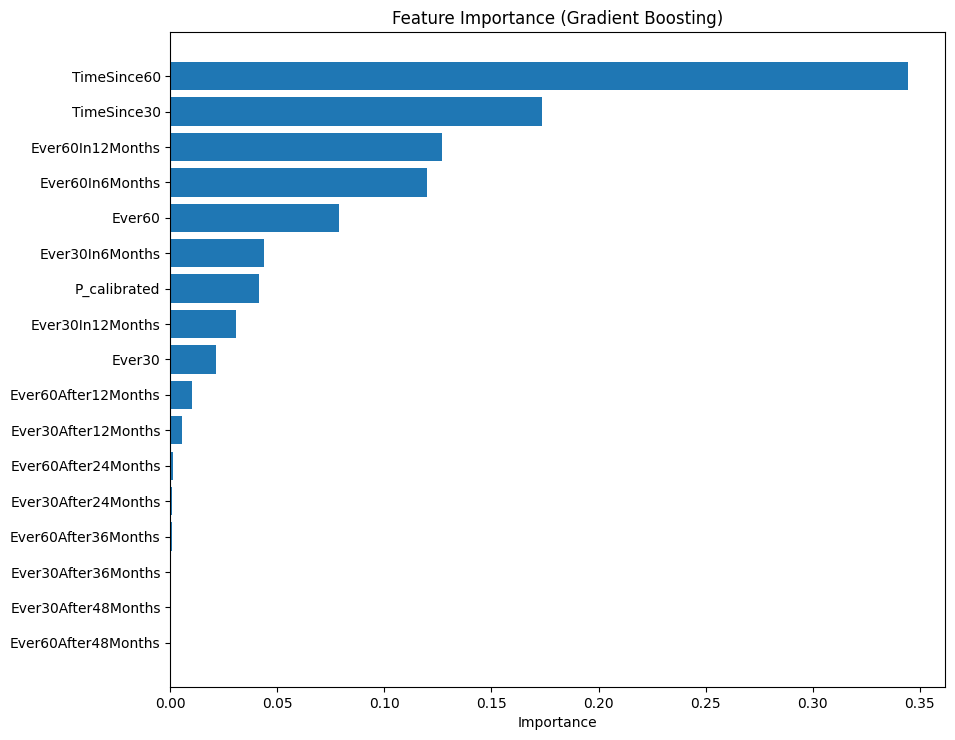

In [ ]:

import matplotlib.pyplot as plt
# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_


# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_

feature_names = X.columns
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

















    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_bgc = sorted_importances 

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()




In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters
best_params = {'bootstrap': True,'criterion': 'gini','max_depth': 10,'max_features': 10,'min_samples_leaf': 5,'min_samples_split': 7,'n_estimators': 5}

# Create tuned RFC model using best parameters
rfr_tune = RandomForestClassifier(**best_params)
rfr_tune.fit(Xtrain, Y)


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=5)

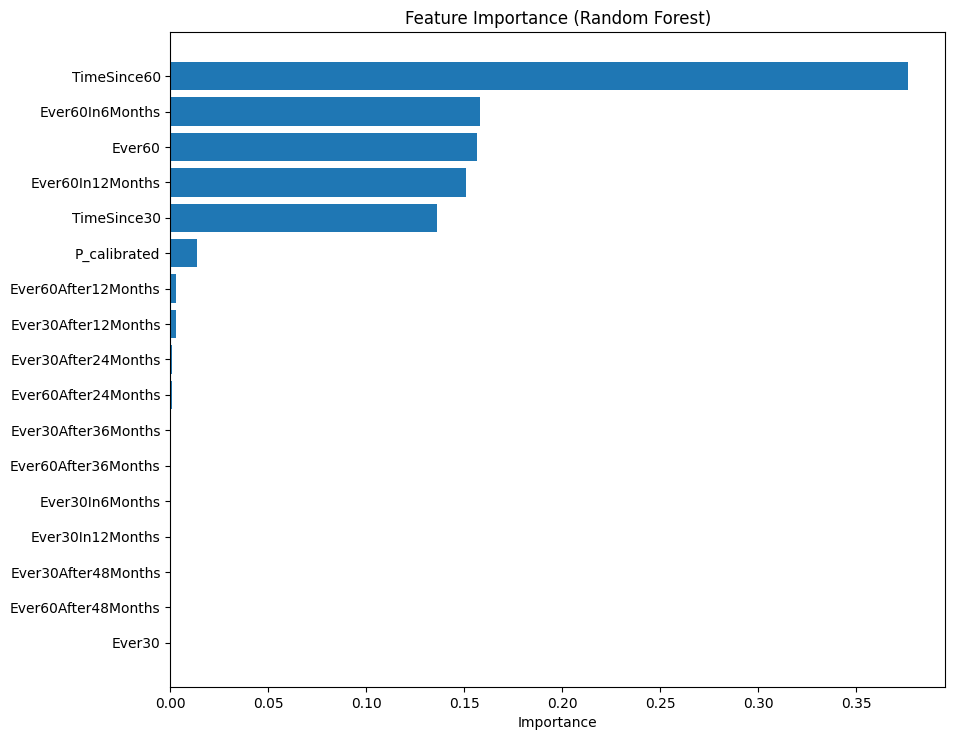

In [ ]:

# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = rfr_tune.feature_importances_
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_rfs = sorted_importances 

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming you have your data loaded in Xtrain and Ytrain

# Hyperparameters you've determined
best_params = {'C': 0.001, 'max_iter': 1000000, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create and fit the Logistic Regression model using the best parameters
lr_tuned = LogisticRegression(**best_params)
lr_tuned.fit(Xtrain, Y)

# Cross-validated score (assuming 5-fold cross validation for example)
#CVS_LR_Tuned = cross_val_score(lr_tuned, Xtrain, Ytrain, cv=5)
#print("Cross-validated score for tuned Logistic Regression:", CVS_LR_Tuned.mean())


LogisticRegression(C=0.001, max_iter=1000000)

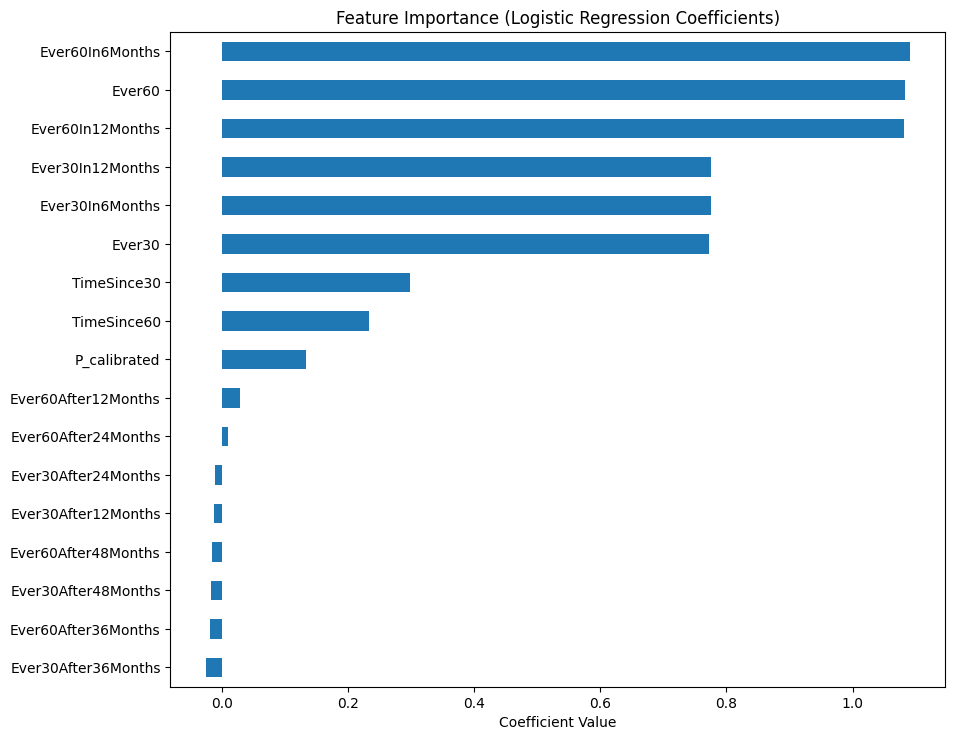

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

feature_importance = pd.Series(coefficients, index=feature_names).sort_values()

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()




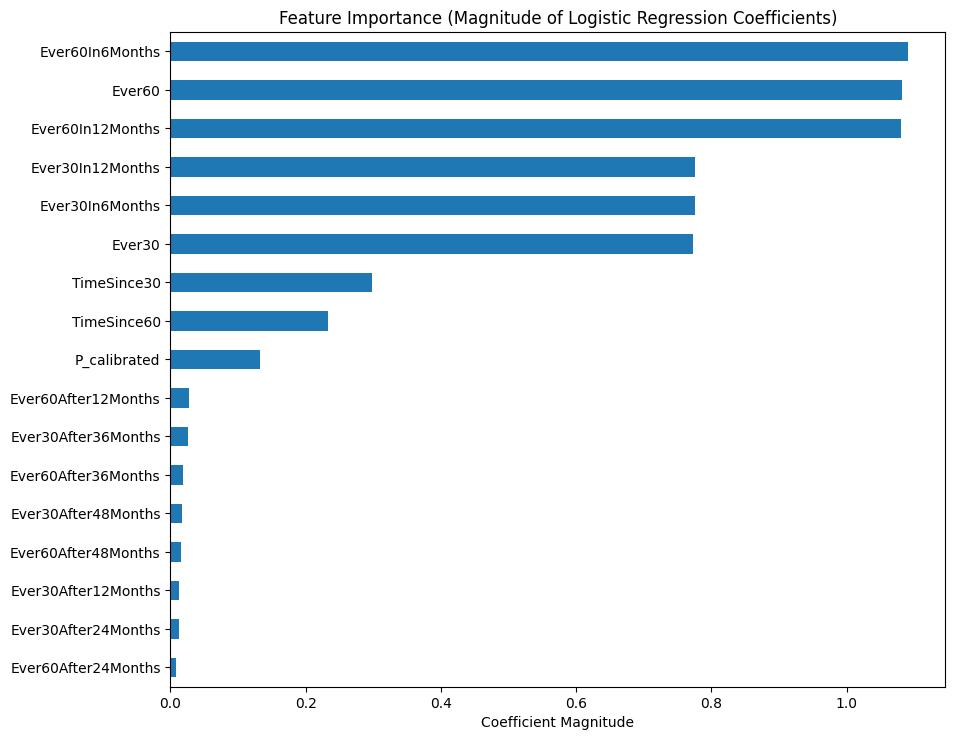

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

# Compute the absolute values of the coefficients to get the magnitude of importance
feature_magnitude = pd.Series(abs(coefficients), index=feature_names)

# Sort by magnitude
sorted_features = feature_magnitude.sort_values(ascending=True)

# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_lg = sorted_importances 

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
sorted_features.plot(kind='barh')
plt.title('Feature Importance (Magnitude of Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.show()




In [ ]:

def Normalize_dictionaries(sorted_importances_lg):
    # Calculate the total sum of all feature importances
    total_importance = sum(sorted_importances_lg.values())

    # Normalize each feature's importance by dividing it by the total importance
    return {k: v/total_importance for k, v in sorted_importances_lg.items()}


# Convert DataFrame to dictionary
sorted_importances_Anova = dict(zip(ANOVA_F_table['Numerical_Feature'], ANOVA_F_table['F-Score']))

##3sorted_importances_dct = Normalize_dictionaries(sorted_importances_dct)
sorted_importances_bgc = Normalize_dictionaries(sorted_importances_bgc)
sorted_importances_rfs = Normalize_dictionaries(sorted_importances_rfs)
sorted_importances_lg = Normalize_dictionaries(sorted_importances_lg)
sorted_importances_Anova = Normalize_dictionaries(sorted_importances_Anova)

# Drop 'Age' from all dictionaries

#sorted_importances_dct.pop('AccountNumber', None)
sorted_importances_bgc.pop('AccountNumber', None)
sorted_importances_rfs.pop('AccountNumber', None)
sorted_importances_lg.pop('AccountNumber', None)
sorted_importances_Anova.pop('AccountNumber', None)

# Drop 'Age' from all dictionaries
for i in ['AccountNumber','degenerate_application_id','Gender']:
    

    #sorted_importances_dct.pop(i, None)
    sorted_importances_bgc.pop(i, None)
    sorted_importances_rfs.pop(i, None)
    sorted_importances_lg.pop(i, None)
    sorted_importances_Anova.pop(i, None)



In [ ]:
import plotly.graph_objects as go

# ... Your data for sorted_importances_dct, sorted_importances_bgc, etc. ...

# Combining dictionaries
combined_dict = {
    #'DCT': sorted_importances_dct,
    'BGC': sorted_importances_bgc,
    'RFS': sorted_importances_rfs,
    'LG': sorted_importances_lg,
    'ANOVA': sorted_importances_Anova
}

# Calculate cumulative importance for each feature
cumulative_importance = {}
for feature in sorted_importances_bgc.keys():
    cumulative_importance[feature] = sum(d[feature] for d in combined_dict.values())

# Sort features by cumulative importance
sorted_features = sorted(cumulative_importance, key=cumulative_importance.get, reverse=True)

# Plotting the stacked bar chart:
fig = go.Figure()

for method, importances in combined_dict.items():
    values = [importances.get(feature, 0) for feature in sorted_features]
    fig.add_trace(go.Bar(
        x=sorted_features,
        y=values,
        name=method
    ))

fig.update_layout(
    title="Feature Importances by Method",
    barmode='stack',
    xaxis_title="Features",
    yaxis_title="Importance",
    xaxis={'categoryorder':'total descending', 'tickangle': 45}, # Adjust tick angle for better readability
    width=1800,  # Adjust width
    height=800   # Adjust height
)
fig.show()


<Axes: >

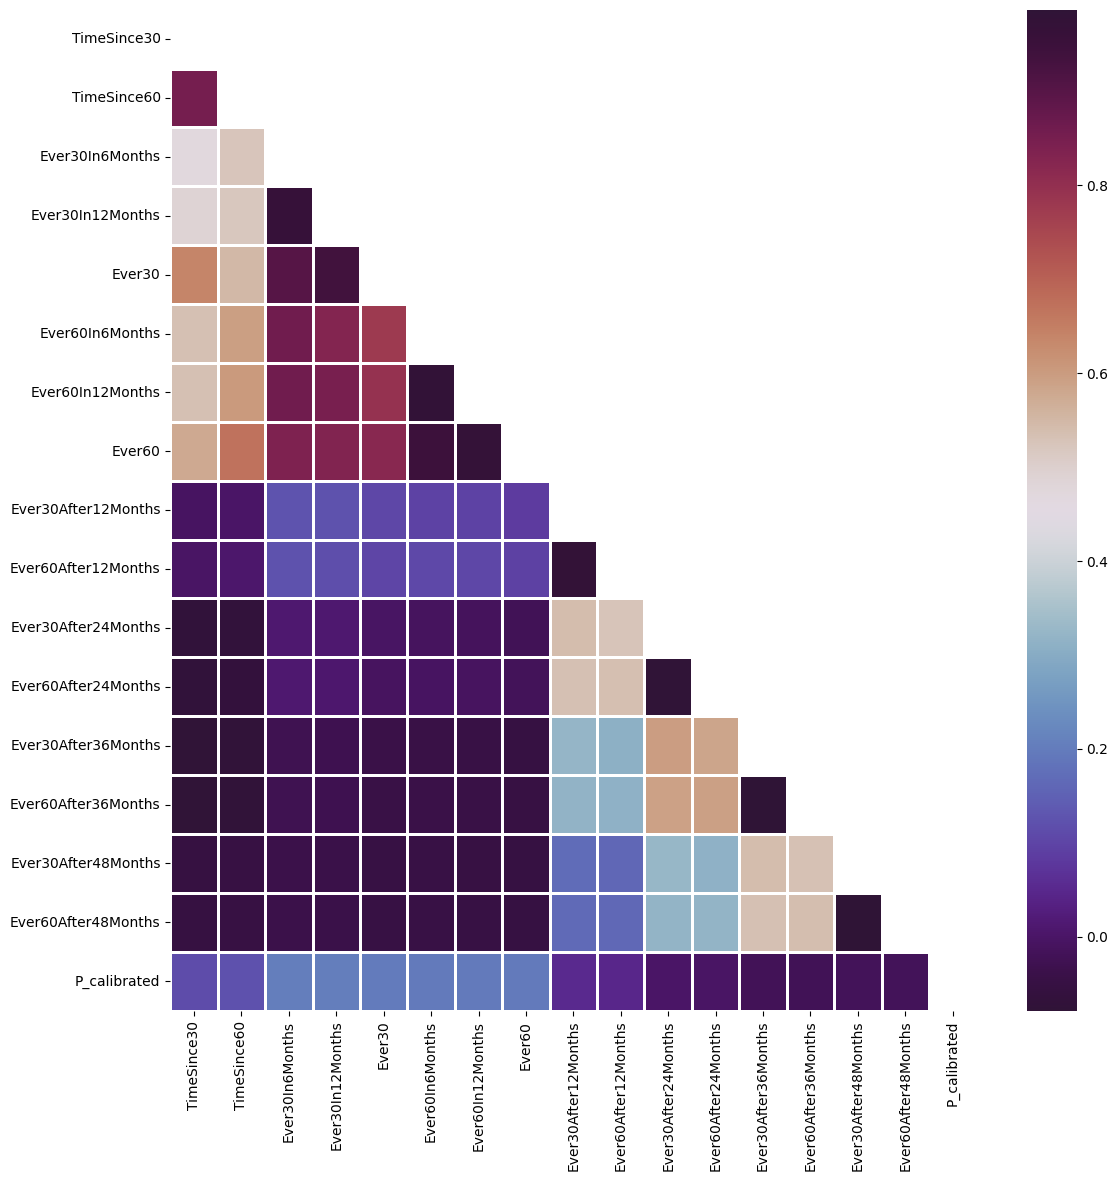

In [ ]:
# calculate pair-wise correlations between them
corrmat = X[X.columns].corr()
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,13))
sns.heatmap(corrmat, cmap='twilight_shifted', cbar=True, linewidths=1, yticklabels=1  , mask=mask)

In [ ]:

correlation_matrix = X[X.columns].corr()

# Identify features that have a correlation greater than 0.8 with another feature
highly_correlated_features = set()

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        # We check if the value is greater than 0.8 and less than 1 
        # because a feature always has a correlation of 1 with itself
        if (correlation_matrix[col][idx] > 0.85 ) and correlation_matrix[col][idx] < 1:  # or correlation_matrix[col][idx] < -0.85
            highly_correlated_features.add(col)
            highly_correlated_features.add(idx)

print(list(highly_correlated_features))


['Ever30After48Months', 'Ever30In6Months', 'Ever60After48Months', 'TimeSince30', 'Ever60After12Months', 'Ever60', 'Ever30After36Months', 'Ever60After24Months', 'Ever30After24Months', 'Ever60After36Months', 'Ever60In12Months', 'TimeSince60', 'Ever60In6Months', 'Ever30In12Months', 'Ever30', 'Ever30After12Months']


In [ ]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrmat[mask] = np.nan
(corrmat
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .format("{:.2f}"))


,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever30After12Months,Ever60After12Months,Ever30After24Months,Ever60After24Months,Ever30After36Months,Ever60After36Months,Ever30After48Months,Ever60After48Months,P_calibrated
TimeSince30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TimeSince60,0.85,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In6Months,0.47,0.52,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In12Months,0.49,0.52,0.96,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30,0.64,0.55,0.90,0.94,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In6Months,0.53,0.59,0.86,0.83,0.78,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In12Months,0.53,0.60,0.86,0.85,0.79,0.98,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60,0.58,0.67,0.84,0.83,0.82,0.95,0.97,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30After12Months,-0.01,-0.00,0.12,0.12,0.10,0.10,0.09,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60After12Months,-0.00,0.01,0.12,0.12,0.10,0.11,0.10,0.09,0.97,nan,nan,nan,nan,nan,nan,nan,nan


<Figure size 1200x1200 with 0 Axes>

toKeep

In [ ]:
toKeep 

In [110]:
toKeep = toKeep[['TimeSince30' , 'Ever30In6Months' ,'TimeSince60' , 'Ever60In6Months' ,'P_calibrated' ,'Ever60After12Months']]

In [111]:
toKeep

,TimeSince30,Ever30In6Months,TimeSince60,Ever60In6Months,P_calibrated,Ever60After12Months
3,0.0,0,0.0,0,0.073110,0
4,0.0,0,0.0,0,0.073110,0
5,0.0,0,0.0,0,0.073110,0
6,0.0,0,0.0,0,0.073110,0
7,0.0,0,0.0,0,0.073110,0
...,...,...,...,...,...,...
189418,0.0,0,0.0,0,0.025444,-1
189422,0.0,0,0.0,0,0.024504,-1
189426,0.0,0,0.0,0,0.051579,-1
189430,0.0,0,0.0,0,0.038157,-1
